In [30]:
import numpy as np # creating and manipulating arrays
import matplotlib.pyplot as plt # visualizing data
import sklearn # regression models
import statsmodels.api as sm 
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

# simple linear regression model using Statmodels.

In [31]:
# import data

data = pd.read_csv("C:/Users/pavan/OneDrive/Desktop/garments_worker_productivity.csv")
data=data.fillna(0)
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


In [32]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [33]:
# Find missing values

data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,687.228070,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1514.582341,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [34]:
# Encoding --> convert categorical into quantitative

data['date'] = data['date'].astype('category')
data['date'] = data['date'].cat.codes

data['quarter'] = data['quarter'].astype('category')
data['quarter'] = data['quarter'].cat.codes

data['department'] = data['department'].astype('category')
data['department'] = data['department'].cat.codes

data['day'] = data['day'].astype('category')
data['day'] = data['day'].cat.codes


In [35]:
# Create inputs and output
y = data['actual_productivity']
x = data.drop('actual_productivity', axis =1)

x

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0,0,2,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,0,0,1,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0
2,0,0,2,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,0,0,2,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,0,0,2,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,51,1,0,5,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0
1193,51,1,0,5,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0
1194,51,1,0,5,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0
1195,51,1,0,5,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0


In [36]:
x=sm.add_constant(x)
model = sm.OLS(endog= y, exog= x)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.284
Model:                             OLS   Adj. R-squared:                  0.276
Method:                  Least Squares   F-statistic:                     33.51
Date:                 Tue, 13 Sep 2022   Prob (F-statistic):           5.23e-76
Time:                         19:14:05   Log-Likelihood:                 591.95
No. Observations:                 1197   AIC:                            -1154.
Df Residuals:                     1182   BIC:                            -1078.
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [37]:
# Create inputs and output
y = data['actual_productivity']
x = data.drop('actual_productivity', axis =1)

x

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0,0,2,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,0,0,1,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0
2,0,0,2,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,0,0,2,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,0,0,2,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,51,1,0,5,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0
1193,51,1,0,5,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0
1194,51,1,0,5,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0
1195,51,1,0,5,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42)

In [39]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
#y_pred = pd.DataFrame(y_pred, columns = ['Predictions'])

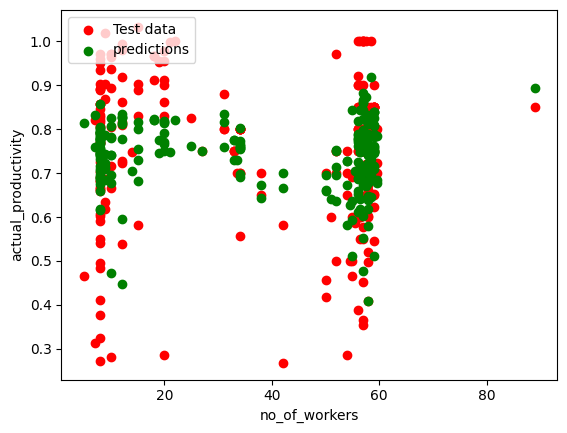

In [40]:
plt.scatter(x_test['no_of_workers'], y_test, color = "red", label = "Test data")
plt.scatter(x_test['no_of_workers'], y_pred, color = "green", label = "predictions")
plt.xlabel("no_of_workers")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [41]:
val_error = mean_squared_error(y_test, y_pred)

y_train_pred = reg.predict(x_train)
train_error = mean_squared_error(y_train, y_train_pred)

# Get validation scores
scores = cross_validate(reg, x_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = reg.score(x_test, y_test)
print("R-squared:", score)

Training MSE:  0.022157824586983395
Validation MSE:  -0.051175109009138686
R-squared: 0.18746738175021638


 # The best features using forward selection:
Forward selection is almost similar to Stepwise regression however the only difference is that in forward selection we only keep adding the features. We do not delete the already added feature. in every iteration, we add only those features which increase the overall model fit mainly WIP,over_time,incentive,idle_time, department  etc.,





polynomial regression model

In [42]:

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = .2, random_state = 42)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)
x_val_poly = poly_features.fit_transform(x_val)


sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(x_train_poly, y_train.ravel())
poly_train_pred = sgd_reg.predict(x_train_poly)
poly_test_pred = sgd_reg.predict(x_test_poly)
poly_val_pred = sgd_reg.predict(x_val_poly)

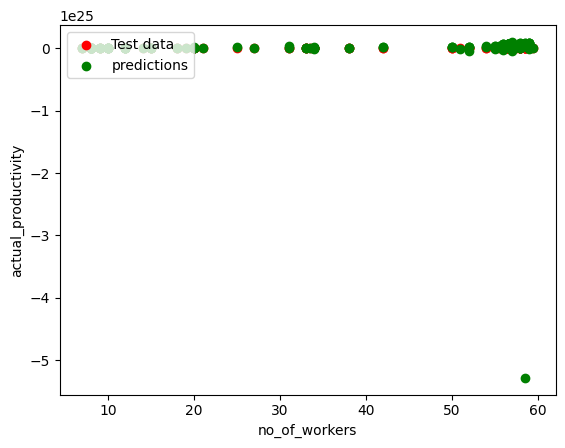

In [43]:
plt.scatter(x_test['no_of_workers'], y_test, color = "red", label = "Test data")
plt.scatter(x_test['no_of_workers'], poly_test_pred, color = "green", label = "predictions")
plt.xlabel("no_of_workers")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [44]:
val_error = mean_squared_error(y_val, poly_val_pred)
train_error = mean_squared_error(y_train, poly_train_pred)

print("Training MSE: ", train_error)
print("Validation MSE: ", val_error)

score = sgd_reg.score(x_train_poly, y_train)
print("R-squared:", score)

Training MSE:  3.6581613710858154e+49
Validation MSE:  5.678334941512658e+48
R-squared: -1.1666375041942732e+51


#AS R-squared is negative

Lasso regression model

In [64]:
lasso = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l1", max_iter=1000, tol=1e-3, random_state=42))
lasso.fit(x_train, y_train)
lasso_train_pred = lasso.predict(x_train)
lasso_test_pred = lasso.predict(x_test)
lasso_val_pred = lasso.predict(x_val)

val_error = mean_squared_error(y_val, lasso_val_pred)
train_error = mean_squared_error(y_train, lasso_train_pred)

# Get validation scores
scores = cross_validate(lasso, x_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = lasso.score(x_test, y_test)
print("R-squared:", score)

Training MSE:  50291820001624.68
Validation MSE:  -613929572.6659435
R-squared: -4.660404758096788e+16


Ridge regression model.

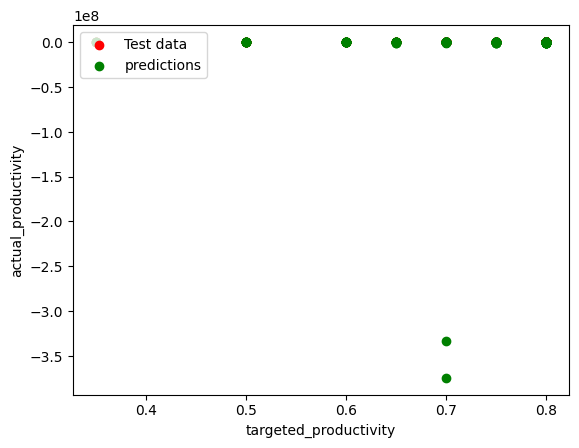

In [46]:

ridge = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l2", max_iter=1000, tol=1e-3, random_state=42))
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

plt.scatter(x_test['targeted_productivity'], y_test, color = "red", label = "Test data")
plt.scatter(x_test['targeted_productivity'], y_pred, color = "green", label = "predictions")
plt.xlabel("targeted_productivity")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [47]:
ridge_train_pred = ridge.predict(x_train)
ridge_test_pred = ridge.predict(x_test)
ridge_val_pred = ridge.predict(x_val)

val_error = mean_squared_error(y_val, ridge_val_pred)
train_error = mean_squared_error(y_train, ridge_train_pred)

# Get validation scores
scores = cross_validate(ridge, x_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = ridge.score(x_test, y_test)
print("R-squared:", score)

Training MSE:  50562881548959.99
Validation MSE:  -721552079.6811346
R-squared: -4.68552187657715e+16


Elasticnet Model

In [48]:

elasticnet = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=42))
elasticnet.fit(x_train, y_train)
elasticnet_train_pred = elasticnet.predict(x_train)
elasticnet_test_pred = elasticnet.predict(x_test)
elasticnet_val_pred = elasticnet.predict(x_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

# Get validation scores
scores = cross_validate(elasticnet, x_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = elasticnet.score(x_test, y_test)
print("R-squared:", score)

Training MSE:  50521693440980.39
Validation MSE:  -705233680.2828277
R-squared: -4.681705300334023e+16


# Grid Search

In [50]:
# Grid search - this will take about 1 minute.

SGD = SGDRegressor(penalty="elasticnet")

parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(estimator = SGD, param_grid = parameters, cv = 2, n_jobs=-1)

clf.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=SGDRegressor(penalty='elasticnet'), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive']})

Early Stopping

In [54]:
elasticnet = make_pipeline(StandardScaler(), SGDRegressor(early_stopping = True, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=42))
elasticnet.fit(x_train, y_train)
elasticnet_train_pred = elasticnet.predict(x_train)
elasticnet_test_pred = elasticnet.predict(x_test)
elasticnet_val_pred = elasticnet.predict(x_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

# Get validation scores
scores = cross_validate(elasticnet, x_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = elasticnet.score(x_test, y_test)
print("R-squared:", score)

Training MSE:  0.023300628591405637
Validation MSE:  -0.5013761030580569
R-squared: -1.0487955479176319


#Identify the best, among all the 4 (linear, lasso, ridge, and elastic net) based on the
performance metrics.

#Linear regression Model is the best among all the 4 models